# Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd

from env import *
from wrangle import *

> Ideas

look for. . .

– scale—are all features measured on the same scale?

– units—do we know how to interpret the numbers?

– range—are values capped?

– shape of distributions—long tails?

- suppose that we have reason to believe that median income strongly correlated with median housing price

## Exercises

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### `target = logerror`

In [17]:
df.columns

Index(['parcelid', 'id', 'bathroom_count', 'bedroom_count',
       'calculated_finished_square_feet', 'finished_square_feet_12', 'fips',
       'full_bath_count', 'latitude', 'longitude', 'lot_size_square_feet',
       'property_county_landuse_code', 'property_land_use_type_id',
       'raw_census_tract_and_block', 'region_id_city', 'region_id_county',
       'region_id_zip', 'room_count', 'year_built',
       'structure_taxvalue_dollarcount', 'tax_valuedollar_count',
       'assessment_year', 'land_tax_value_dollar_count', 'tax_amount',
       'census_tract_and_block', 'id_1', 'log_error', 'transaction_date',
       'bed_bath_count'],
      dtype='object')

In [ ]:
df = wrangle_zillow()

In [ ]:
def train_val_test_split(df, target_variable):
    df_copy = df.copy()
    X = df_copy.drop(target_variable, axis=1)
    y = df_copy[target_variable]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
    
    train_df = pd.concat([X_train, y_train], axis=1)
    val_df = pd.concat([X_val, y_val], axis=1)
    test_df = pd.concat([X_test, y_test], axis=1)

    return train_df, val_df, test_df

In [ ]:
target = 'log_error'
train, test = train_test_split(df, stratify=df[target], test_size=0.2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(stratify_column, axis=1),
    df[stratify_column],
    stratify=df[stratify_column],
    test_size=0.2
)

In [14]:
fips_dict = {'06037':'Los Angeles County','06111':'Ventura County','06059':'Orange County'}

In [ ]:
# 1. 

# 2. 

# 3. 

# 4. 

# 5. 

### 2. Answer those questions through a mix of statistical tests and visualizations

In [19]:
df.columns

Index(['parcelid', 'id', 'bathroom_count', 'bedroom_count',
       'calculated_finished_square_feet', 'finished_square_feet_12', 'fips',
       'full_bath_count', 'latitude', 'longitude', 'lot_size_square_feet',
       'property_county_landuse_code', 'property_land_use_type_id',
       'raw_census_tract_and_block', 'region_id_city', 'region_id_county',
       'region_id_zip', 'room_count', 'year_built',
       'structure_taxvalue_dollarcount', 'tax_valuedollar_count',
       'assessment_year', 'land_tax_value_dollar_count', 'tax_amount',
       'census_tract_and_block', 'id_1', 'log_error', 'transaction_date',
       'bed_bath_count'],
      dtype='object')

What is the average calculated square footage of the houses?

What is the average number of bedrooms per house?

What is the average number of bathrooms per house?

What is the median lot size for the houses?

What is the mean tax value for the houses?

What is the median room count for the houses?

What is the average year built for the houses?

How do the structure tax values differ by county? 

What is the average latitude and longitude of the houses?

How does the assessed tax value of a house relate to its land tax value?

    How does the bed_bath_count of a property relate to its log_error?
    Are properties with more bathrooms more likely to have a higher or lower log_error?
    Is there a correlation between the tax_valuedollar_count and log_error?
    Is there a relationship between the year_built of a property and its log_error?
    How does the square_feet of a property relate to its log_error?
    Are properties in certain locations more likely to have a higher or lower log_error?
    Are properties with bigger square feet have more or less log_error?
    Is there a relationship between the bed_bath_count, bathroom_count, and square_feet with log_error?

In [ ]:
# Correlation of `columns` to 

In [23]:
df.columns

Index(['parcelid', 'id', 'bathroom_count', 'bedroom_count',
       'calculated_finished_square_feet', 'finished_square_feet_12', 'fips',
       'full_bath_count', 'latitude', 'longitude', 'lot_size_square_feet',
       'property_county_landuse_code', 'property_land_use_type_id',
       'raw_census_tract_and_block', 'region_id_city', 'region_id_county',
       'region_id_zip', 'room_count', 'year_built',
       'structure_taxvalue_dollarcount', 'tax_valuedollar_count',
       'assessment_year', 'land_tax_value_dollar_count', 'tax_amount',
       'census_tract_and_block', 'id_1', 'log_error', 'transaction_date',
       'bed_bath_count'],
      dtype='object')

In [34]:
df[['bathroom_count', 'bathroom_count', 'calculated_finished_square_feet','log_error']].corr()['log_error']

bathroom_count                     0.035153
bathroom_count                     0.035153
calculated_finished_square_feet    0.038331
log_error                          1.000000
Name: log_error, dtype: float64

In [30]:
correlation = df.corr()
print(correlation['log_error'].sort_values(ascending=False))

log_error                          1.000000
bed_bath_count                     0.039927
calculated_finished_square_feet    0.038331
finished_square_feet_12            0.038331
bedroom_count                      0.037266
bathroom_count                     0.035153
full_bath_count                    0.033012
longitude                          0.025616
year_built                         0.020531
room_count                         0.015448
parcelid                           0.012900
raw_census_tract_and_block         0.008476
region_id_city                     0.007588
lot_size_square_feet               0.007363
census_tract_and_block             0.005331
structure_taxvalue_dollarcount     0.004525
region_id_zip                      0.002945
id                                 0.001980
id_1                               0.001687
tax_valuedollar_count             -0.002449
tax_amount                        -0.004613
land_tax_value_dollar_count       -0.005537
latitude                        

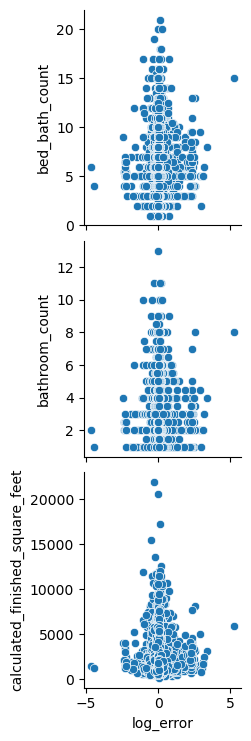

In [28]:
sns.pairplot(df, y_vars=['bed_bath_count', 'bathroom_count', 'calculated_finished_square_feet'], x_vars='log_error')
plt.show()

In [21]:
df.corrwith(df.log_error).sort_values(ascending=False)

log_error                          1.000000
bed_bath_count                     0.039927
calculated_finished_square_feet    0.038331
finished_square_feet_12            0.038331
bedroom_count                      0.037266
bathroom_count                     0.035153
full_bath_count                    0.033012
longitude                          0.025616
year_built                         0.020531
room_count                         0.015448
parcelid                           0.012900
raw_census_tract_and_block         0.008476
region_id_city                     0.007588
lot_size_square_feet               0.007363
census_tract_and_block             0.005331
structure_taxvalue_dollarcount     0.004525
region_id_zip                      0.002945
id                                 0.001980
id_1                               0.001687
tax_valuedollar_count             -0.002449
tax_amount                        -0.004613
land_tax_value_dollar_count       -0.005537
latitude                        

#### - 1. 
$H{0}$: There is no correlation

$H{A}$: There is a correlation

#### - 2. 
$H{0}$: There is no correlation

$H{A}$: There is a correlation

#### - 3. 
$H{0}$: There is no correlation

$H{A}$: There is a correlation

#### - 4. 
$H{0}$: There is no correlation

$H{A}$: There is a correlation

#### - 5. 
$H{0}$: There is no correlation

$H{A}$: There is a correlation

In [ ]:
pd.plotting.scatter_matrix(df_slice, alpha=0.2)